In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generates Poisson samples with exclusion
def generate (L, d, e):
    """ L = lenght of the sample
        d = mean intersample distribution, 1/nbar
        e = exlusion (no two samples closer than e), on both sides (total exclusio = 2e)"""
        
    # First generate sufficient number of samples that we'll get the rigth number after pruning
    Ngenbar = L / (d-e) # this actually needs to be d-e, not d-2*e due to double counting
    assert Ngenbar>0
    Ngen = np.random.poisson(Ngenbar,1)
    raw = np.random.uniform(0,L,Ngen)
    if e==0:
        return raw # no exclusion, don't wast time sorting
    raw = np.sort(raw)
    while True:
        #print(raw)
        diff = raw[1:]-raw[:-1]
        ### pick the shortest distance and remove 
        mindisti = np.argmin(diff) 
        #print (diff[mindisti])
        if (diff[mindisti]>=e):
            break
        ii = mindisti+ np.random.randint(0,2) ## pick either first or second one
        raw = np.hstack((raw[:ii],raw[ii+1:]))
    return raw
        
    
def get_ps (data,data2=None):
    if data2 is None:
        pspec = np.abs(np.fft.rfft(data)**2) #skip first and last k modes 
    else:
        pspec = np.real(np.fft.rfft(data)*np.conj(np.fft.rfft(data2)))
    return pspec[1:-1]/len(data)

In [3]:
def make_plots (L,d,e,Nrel):
    data = [generate (L,d,e) for i in range(Nrel)]
    nbar_mean = np.mean([len(_data)/L for _data in data])
    nbar_theory = 1/d
    print ("nbar realized",nbar_mean, "theory", nbar_theory)
    ## weird factors get normalization right
    ps = []
    cross_ps = [] 
    for _data in data:
        full = np.bincount(_data.astype(int),minlength=L)
        half = np.bincount(np.random.choice(_data, len(_data)//2, replace=False).astype(int), minlength=L)
        other_half = full - half
        ps.append(get_ps(full)*d**2)
        cross_ps.append(get_ps(half,other_half)*d**2)
    ps=np.array(ps)
    cross_ps = np.array(cross_ps)
    mean_ps = ps.mean(axis=0)
    mean_cross_ps = cross_ps.mean(axis=0)
    Nps = len(mean_ps)
    ps_err = np.sqrt(ps.var(axis=0))
    plt.figure(figsize=(10,5))
    plt.plot(mean_ps*nbar_mean)
    plt.plot([0,Nps],[1,1],'k:')
    plt.ylabel('nbar from mean Ps ')
    plt.figure(figsize=(10,5))
    plt.plot(ps_err*nbar_mean)
    plt.plot([0,Nps],[1,1],'k:')
    plt.ylabel('nbar from var Ps ')
    plt.figure(figsize=(10,5))
    plt.plot((mean_cross_ps)*nbar_mean)
    plt.plot([0,Nps],[0,0],'k:')
    plt.ylabel('mean cross Ps ')

    
    plt.figure(figsize=(10,5))
    plt.plot((mean_ps-mean_cross_ps)*nbar_mean)
    #plt.plot((mean_ps)*nbar_theory)
    plt.plot([0,Nps],[1,1],'k:')
    plt.ylabel('nbar from cross Ps ')
    
    
    

nbar realized 0.10002138671875 theory 0.1


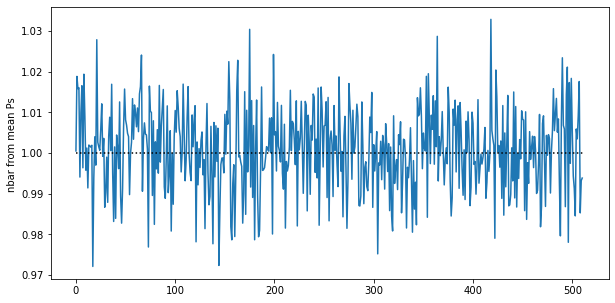

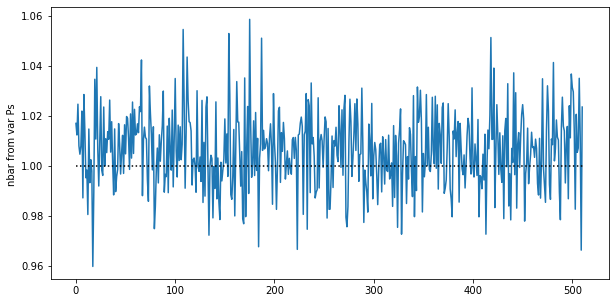

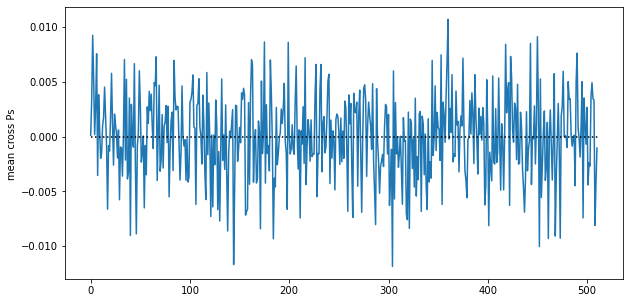

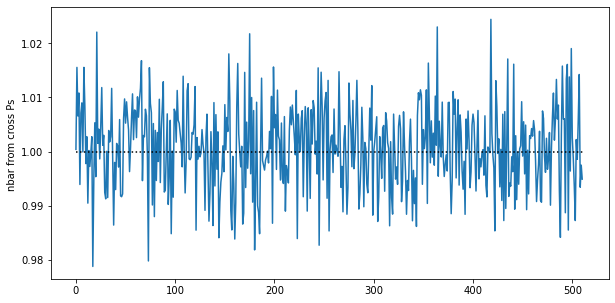

In [4]:
make_plots(1024,10,0,10000)

nbar realized 0.09874013671875 theory 0.1


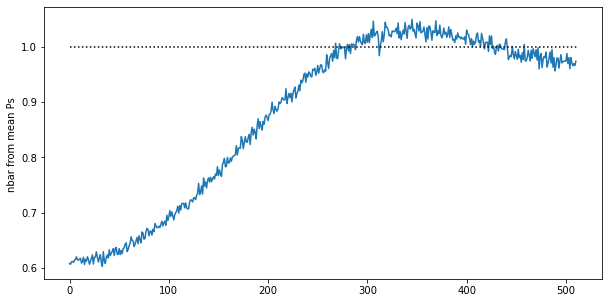

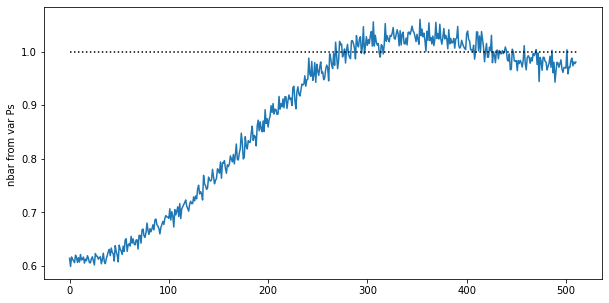

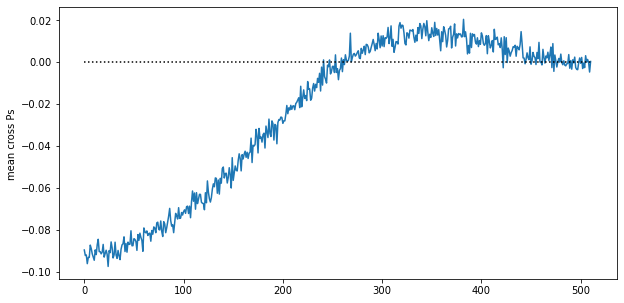

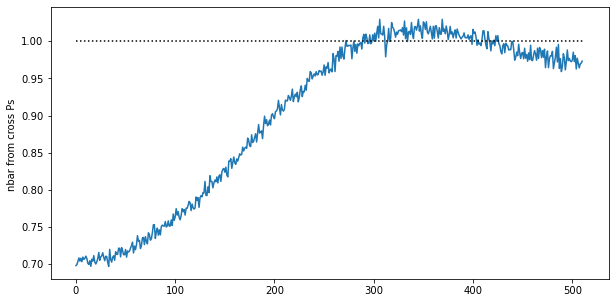

In [5]:
make_plots(1024,10,2,10000)